In [1]:
import sys
import os
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
def ld_data (dir_name):
    # Load data in files from directory dir_name in a pandas dataframe
    df = pd.DataFrame()
    for filename in os.listdir(dir_name):
        funcs = []
        with open(os.path.join(dir_name, filename), 'r') as f:
            lines = f.read().splitlines()
            funcs = [line.strip().split(' ')[1][2:-1] for line in lines if not '@' in line.strip().split(' ')[1][2:-1] and not '?' in line.strip().split(' ')[1][2:-1]]

        # Concat all functions as string in df
        label = 'MALWARE' if filename.startswith('R-') else 'GOODWARE'
        df = pd.concat([df, pd.DataFrame({'filename': filename, 'label': label, 'funcs': ' '.join(funcs)}, index=[0])], ignore_index=True)
        
    return df


In [96]:
dir_name = '../data/executable-functions/'

In [97]:
data = ld_data(dir_name)

# Split the data into train and test
train, test = train_test_split(data, test_size=0.2)

In [98]:
# print first row of the train dataframe
print("GetCurrentThreadId" in train.iloc[0]["funcs"])

False


In [99]:
# Create the tf-idf vectorizer
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(train['funcs']).ceil()
test_vectors = vectorizer.transform(test['funcs']).ceil()

print(vectorizer.get_feature_names_out())
print(train['filename'][0])
print(train_vectors.toarray()[0])

['___lc_codepage_func' '___lc_collate_cp_func' '___lc_handle_func' ...
 'zwupdatewnfstatedata' 'zwwaitforsingleobject' 'zwwritefile']
R-LordEK.sample
[0. 0. 0. ... 0. 0. 0.]


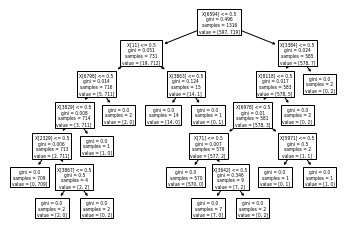

In [106]:
# Train the classifier
classifier = DecisionTreeClassifier()

classifier.fit(train_vectors, train['label'])
# Print information about the decision tree
plot_tree(classifier)
plt.savefig('decision_tree.svg')

In [101]:
pred = classifier.predict(test_vectors)

# Evaluate the classifier
print('Accuracy: {}'.format(accuracy_score(test['label'], pred)))

Accuracy: 0.996969696969697


In [107]:
print(vectorizer.get_feature_names_out()[6594])

rtlcapturecontext


In [103]:
!ls ../data/executable-functions-test/ | grep "R-" | wc -w

53
